# Notebook 17: Introduction to P-Values
***

We'll need Numpy, Matplotlib, and scipy.stats for this notebook, so let's load them. 

In [5]:
import numpy as np 
from scipy import stats
import matplotlib.pylab as plt 
import pandas as pd
%matplotlib inline

### Exercise 1 - Concept Check
*** 

Suppose there is a random variable $X$ with a **triangular distribution** $f(x)$ given by

$f(x) =
\begin{cases} cx & 0 \leq x \leq \dfrac{1}{2} \\
              c(1-x) & \dfrac{1}{2} \leq x \leq 1 \\
              0 & \text{otherwise}
\end{cases}$

where $c$ is some normalizing constant.

**Part A:** What value should $c$ have in order for $f(x)$ to be a proper probability density function?

**Part B:** Suppose you wish to test the hypothesis that the mean of the distribution for $X$ is equal to $1/2$ against the alternative hypothesis that this mean is *not* equal to $1/2$. You collect some data for $X$ and find a test statistic $\hat{X} = 3/4$.

Recall the a p-value is the probability of observing a test statistic as extreme or more extreme than our measurement (which is $3/4$ here). "More extreme" than our test statistic means anything equally or less likely to observe than $3/4$: so, $X \geq 3/4$ and $X \leq 1/4$. Sketch a picture to depict the p-value associated with our hypothesis test. Shade in the area that corresponds to the p-value. (Do this either on a piece of paper or by making a slick plot in Python below.)

**Part C:** Compute the p-value associated with our hypothesis test.

### Exercise 2 - Estimating the Distribution of P-Values 
*** 

Suppose you have a population that is normally distributed with mean $\mu_0$ and standard deviation $\sigma$. In this problem you will simulate many draws from this distribution with a particular sample size and compute p-values for the alternate hypothesis that that $\mu \neq \mu_0$. Finish the function below in order to sample `sample_size` number of p-values.

Then, plot a histogram of the sampled p-values. Set the bin width to be equal to the significance level $\alpha$. What can you say about the distribution of p-values in the case where the Null hypothesis is actually true?  About what proportion of the sampled p-values are such that $p \leq \alpha$?      

In [ ]:
def pvalue_dist(num_tests=10000, sample_size=100, mu0=20, sig=2, alpha=0.05):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
    bins = np.linspace(0, 1, int(1/alpha))
    
pvalue_dist(sample_size=100)

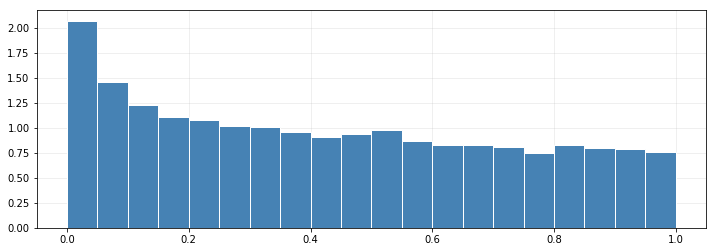

In [10]:
def pvalue_dist(num_tests=10000, sample_size=4, mu0=20, sig=2, alpha=0.05, muA=20):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
    bins = np.linspace(0, 1, int(1/alpha)+1)
    ps = np.zeros(num_tests)
    for ii in range(num_tests):
        xbar = np.mean(stats.norm.rvs(muA,sig,size=sample_size))
        z = (xbar-mu0)/(sig/np.sqrt(sample_size))
        ps[ii] = 2*np.min([stats.norm.cdf(z), 1-stats.norm.cdf(z)])
    pd.Series(ps).hist(ax=ax, color="steelblue", edgecolor="white", bins=bins, density=True)
    ax.grid(alpha=0.25)
    ax.set_axisbelow(True)
    
pvalue_dist(num_tests=int(1e4), sample_size=400, sig=200, muA=27)